In [134]:
import os
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [135]:
course_2019 = pd.read_csv('/content/course_2019.csv', header=0, encoding='unicode_escape')
course_2022 = pd.read_csv('/content/course_2022.csv', header=0, encoding='unicode_escape')

In [136]:
def drop_non_stream(df):
  considered_courses = ['SENG', 'ECE', 'CSC']
  df = df[df['Subj'].isin(considered_courses)].copy()

  df.drop(columns=['CRN', 'Section', 'Instructor', 'Camp', 'Bldg', 'Room', 'Begin', 'End', 'Days', 'Start Date', 'End Date', 'Faculty', 'Status'], inplace=True)

  grouped_df = df.groupby(['Term', 'Subj', 'Num', 'Dept Desc'], as_index=False).sum()

  return grouped_df

def drop_useless_vals(df):
  df.dropna(subset=['Faculty'], inplace=True)
  df = df[df['Faculty'] == 'EN']

  df = df[~df['Section'].str.contains('B|T|W')]

  df.drop(['Title'], axis=1, inplace=True)

  df.drop(['Sched Type'], axis=1, inplace=True)

  df = df[~df['Subj'].str.contains('BME|CIVE|MECH')]

  return df

def assign_yrs(df):
  for index, row in df.iterrows():
    id = row['Num']
    first_digit = int(re.search(r'\d', id).group())

    if first_digit >= 5:
      df = df.drop(index=index)
    else:
      df.loc[index, 'Yr'] = first_digit

  df['Yr'] = df['Yr'].astype(int)

  return df

def split_term(df):
  term_mapping = {
      '01': 'Spring',
      '05': 'Summer',
      '09': 'Fall'
  }

  for index, row in df.iterrows():
    term = str(row['Term'])
    month = re.search(r'\d{2}$', term).group()
    df.loc[index, 'Term'] = term_mapping[month]
  
  return df

In [137]:
year_2019 = drop_useless_vals(course_2019)
year_2022 = drop_useless_vals(course_2022)

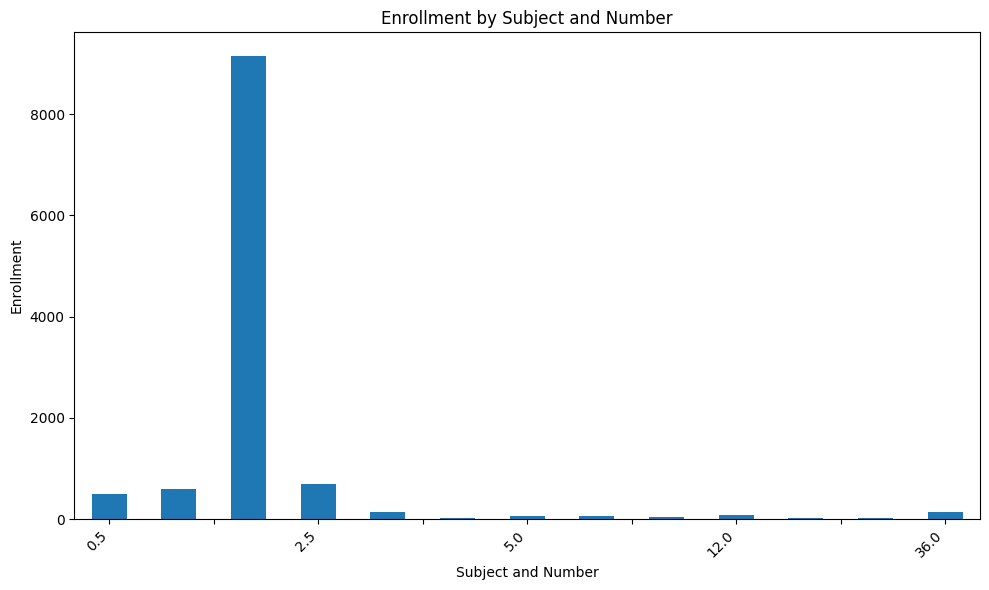

In [138]:
department_enrollment = year_2019.groupby('Units')['Enrolled'].sum()

plt.figure(figsize=(10, 6))
department_enrollment.plot(kind='bar')
plt.xlabel('Subject and Number')
plt.ylabel('Enrollment')
plt.title('Enrollment by Subject and Number')

plt.xticks(rotation=45, ha='right')

plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=10))

plt.tight_layout()
plt.show()


In [139]:
df_2019 = split_term(year_2019)
df_2019 = drop_non_stream(year_2019)
df_2019 = assign_yrs(df_2019)
df_2019.to_csv('course_2019_cleaned.csv', index=False)

df_2022 = split_term(year_2022)
df_2022 = drop_non_stream(year_2022)
df_2022 = assign_yrs(df_2022)
df_2022.to_csv('course_2022_cleaned.csv', index=False)

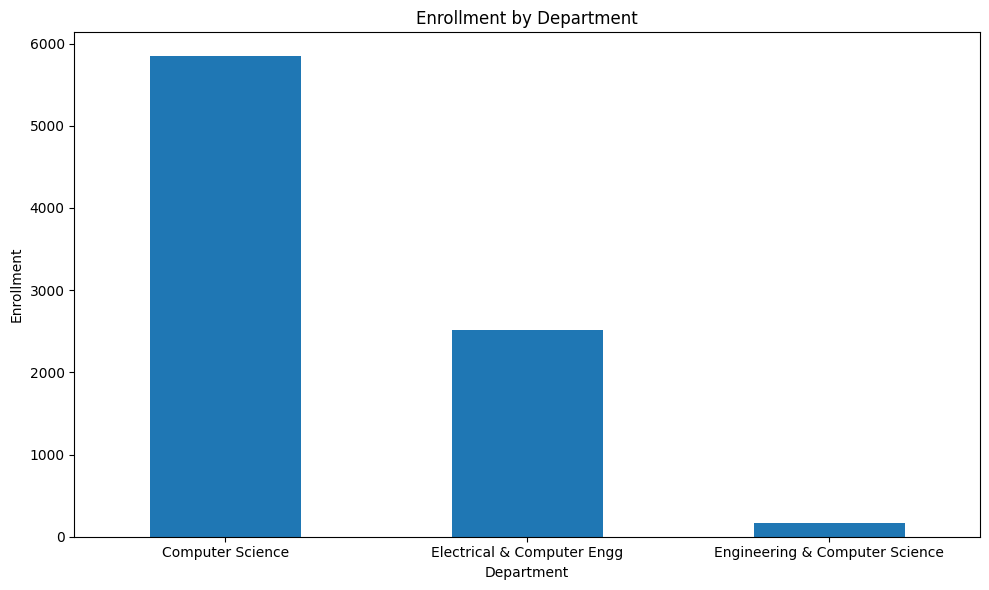

In [140]:
department_enrollment = df_2019.groupby('Dept Desc')['Enrolled'].sum()

plt.figure(figsize=(10, 6))
department_enrollment.plot(kind='bar')
plt.xlabel('Department')
plt.ylabel('Enrollment')
plt.title('Enrollment by Department')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

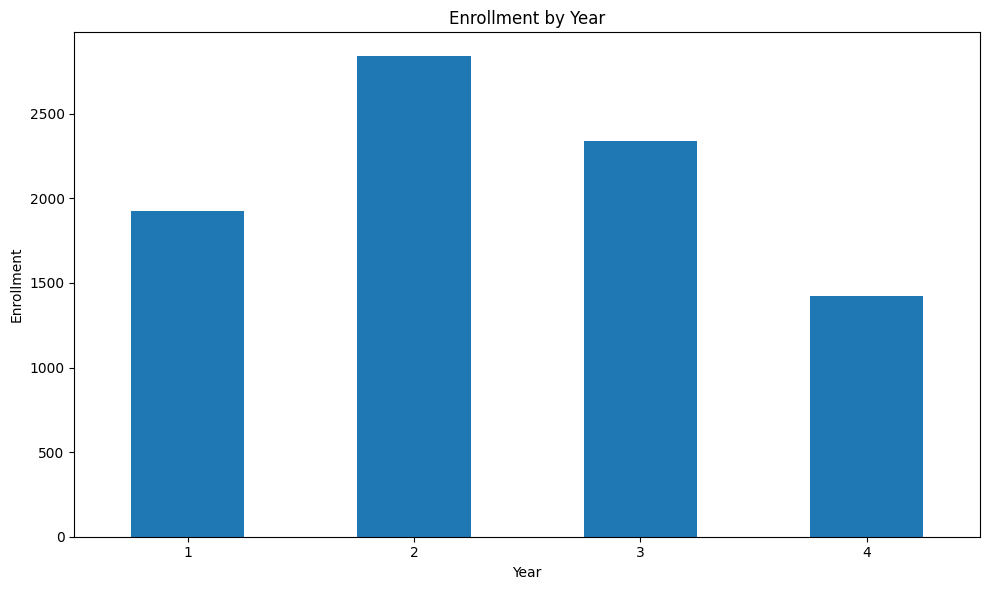

In [141]:
yr_enrollment = df_2019.groupby('Yr')['Enrolled'].sum()

plt.figure(figsize=(10, 6))
yr_enrollment.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Enrollment')
plt.title('Enrollment by Year')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

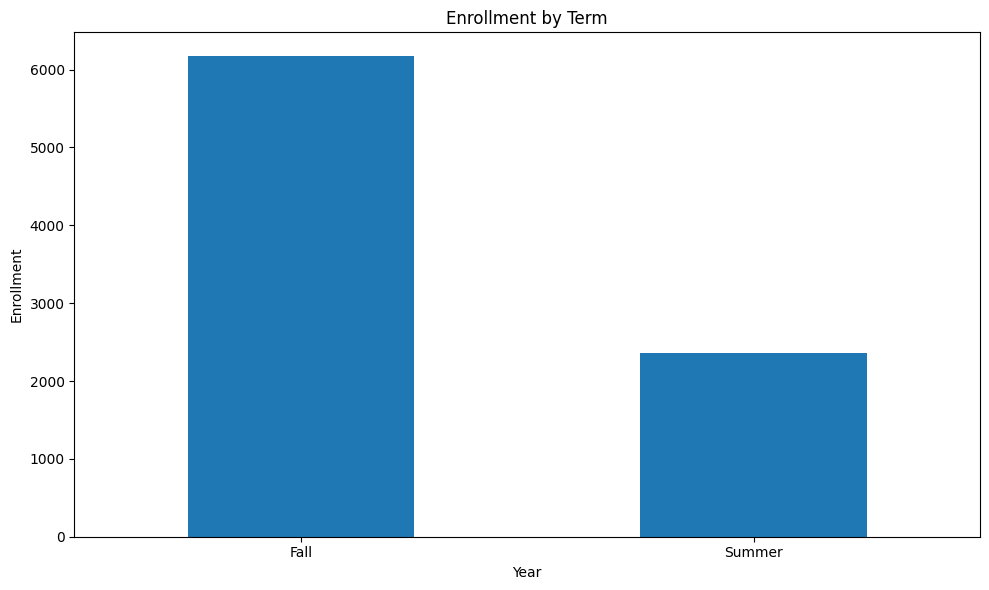

In [142]:
term_enrollment = df_2019.groupby('Term')['Enrolled'].sum()

plt.figure(figsize=(10, 6))
term_enrollment.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Enrollment')
plt.title('Enrollment by Term')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

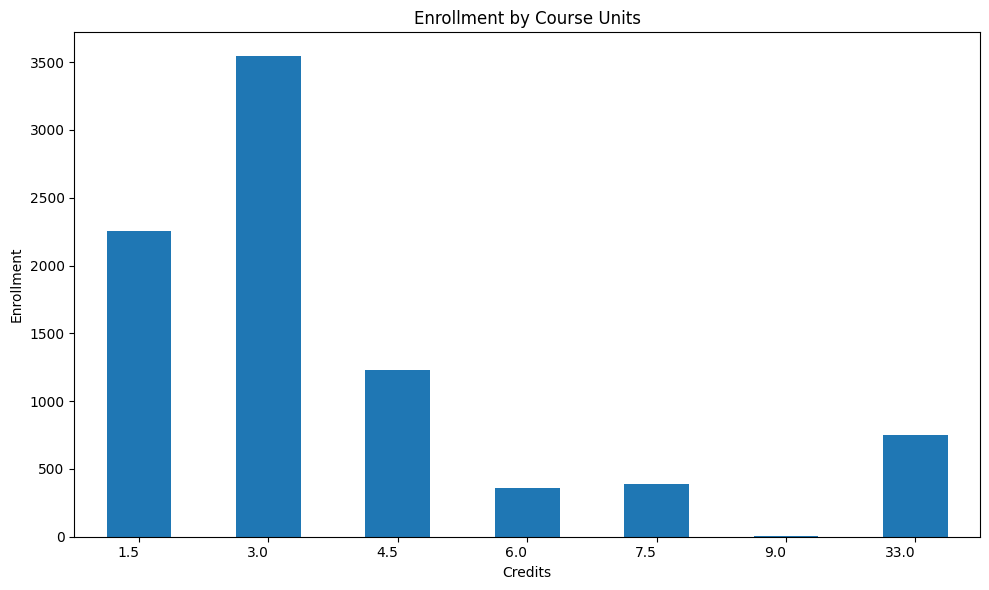

In [143]:
units_enrollment = df_2019.groupby('Units')['Enrolled'].sum()

plt.figure(figsize=(10, 6))
units_enrollment.plot(kind='bar')
plt.xlabel('Credits')
plt.ylabel('Enrollment')
plt.title('Enrollment by Course Units')

plt.xticks(rotation=0, ha='right')

plt.tight_layout()
plt.show()

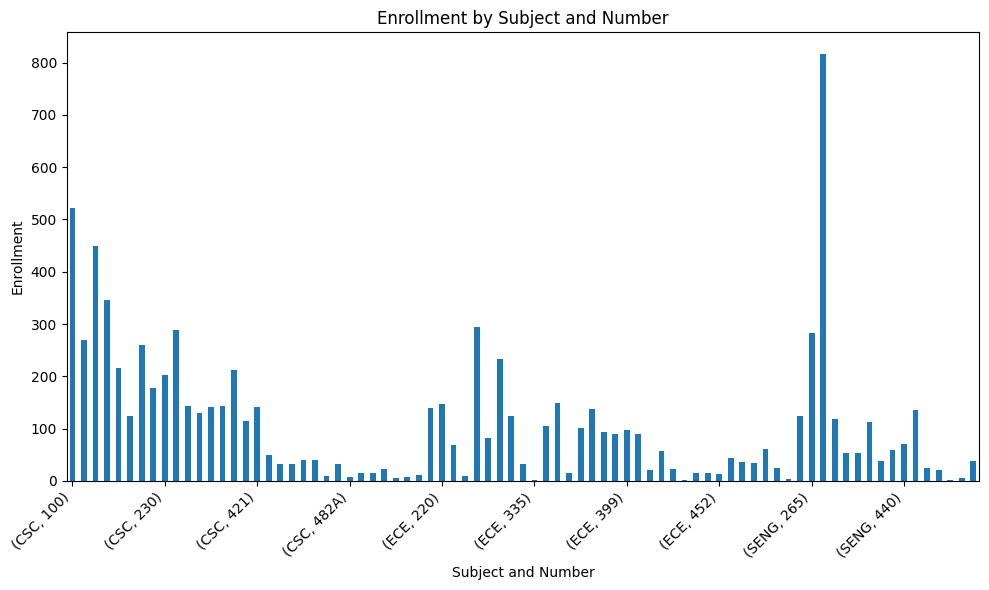

In [144]:
department_enrollment = df_2019.groupby(['Subj', 'Num'])['Enrolled'].sum()

plt.figure(figsize=(10, 6))
department_enrollment.plot(kind='bar')
plt.xlabel('Subject and Number')
plt.ylabel('Enrollment')
plt.title('Enrollment by Subject and Number')

plt.xticks(rotation=45, ha='right')

plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=10))

plt.tight_layout()
plt.show()